In [397]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [318]:
stops_df = pd.read_csv("Stops_Data.csv")
routes_df = pd.read_csv("Routes_Data.csv")

In [319]:
stops_df.head()

,locationType,stopId,stopLat,stopLon,stopName,Coordinates
0,TERMINAL,1,22.642036,88.431122,AIRPORT (GATE NO.1),POINT (88.431122 22.642036)
1,TERMINAL,2,22.652987,88.438289,AIRPORT (GATE NO.3),POINT (88.438289 22.652987)
2,JUNCTION,3,22.489700,88.395331,AJOY NAGAR,POINT (88.395331 22.4897)
3,STOP,5,22.584474,88.214893,ALAMPUR,POINT (88.214893 22.584474)
4,JUNCTION,6,22.525084,88.330894,ALIPORE (LALBATI),POINT (88.330894 22.525084)


In [320]:
routes_df.head()

,endStop,routeDepot,routeDepotList,routeId,routeLongName,routeShortName,startStop
0,NABANNA,NaN,['OTHER'],6155,BARUIPUR - NABANNA,C49:UP,BARUIPUR
1,SHAPOORJI,TARATALA,['TARATALA'],61,PARNASREE - SHAPOORJI,AC4A:UP,PARNASREE
2,SREERAMPUR BUS STAND,OTHER,['OTHER'],5955,KARUNAMOYEE-SREERAMPORE,D4:DN,KARUNAMOYEE (SALT LAKE)
3,AIRPORT (GATE NO.1),NaN,['OTHER'],5751,HOWRAH STATION - AIRPORT (GATE NO.1),NS1:UP,HOWRAH STATION
4,HOWRAH STATION,NaN,['OTHER'],5748,NEWTOWN - HOWRAH STATION,NS14:DN,NEWTOWN


In [321]:
X = pd.DataFrame()
X['stopName'] = stops_df['stopName'].sort_values()

In [322]:
X.reset_index(inplace=True,drop=True)

In [323]:
len(X)#.head()   # 1681 stops

1678

In [324]:
l1 = routes_df['startStop'].unique().tolist()
l2 = routes_df['endStop'].unique().tolist()
s1 = set(l1).union(l2)

In [325]:
s1 = list(s1)
s1.sort()

In [326]:
X.head()

,stopName
0,A.J BLOCK ( 206 BUS STAND)
1,CANTONMENT 2 NO. RAIL GATE
2,PSC OFFICE
3,10 NO POOL
4,10 NO TANK


In [327]:
len(s1)

410

In [328]:
Y = pd.DataFrame(s1,columns = ['routeStops'])

In [329]:
X['routeStops'] = Y['routeStops']

In [330]:
X.head()

,stopName,routeStops
0,A.J BLOCK ( 206 BUS STAND),A.J BLOCK ( 206 BUS STAND)
1,CANTONMENT 2 NO. RAIL GATE,BABUGHAT (ESPLANADE)
2,PSC OFFICE,CANTONMENT 2 NO. RAIL GATE
3,10 NO POOL,12 NO. TANK
4,10 NO TANK,13 NO TANK


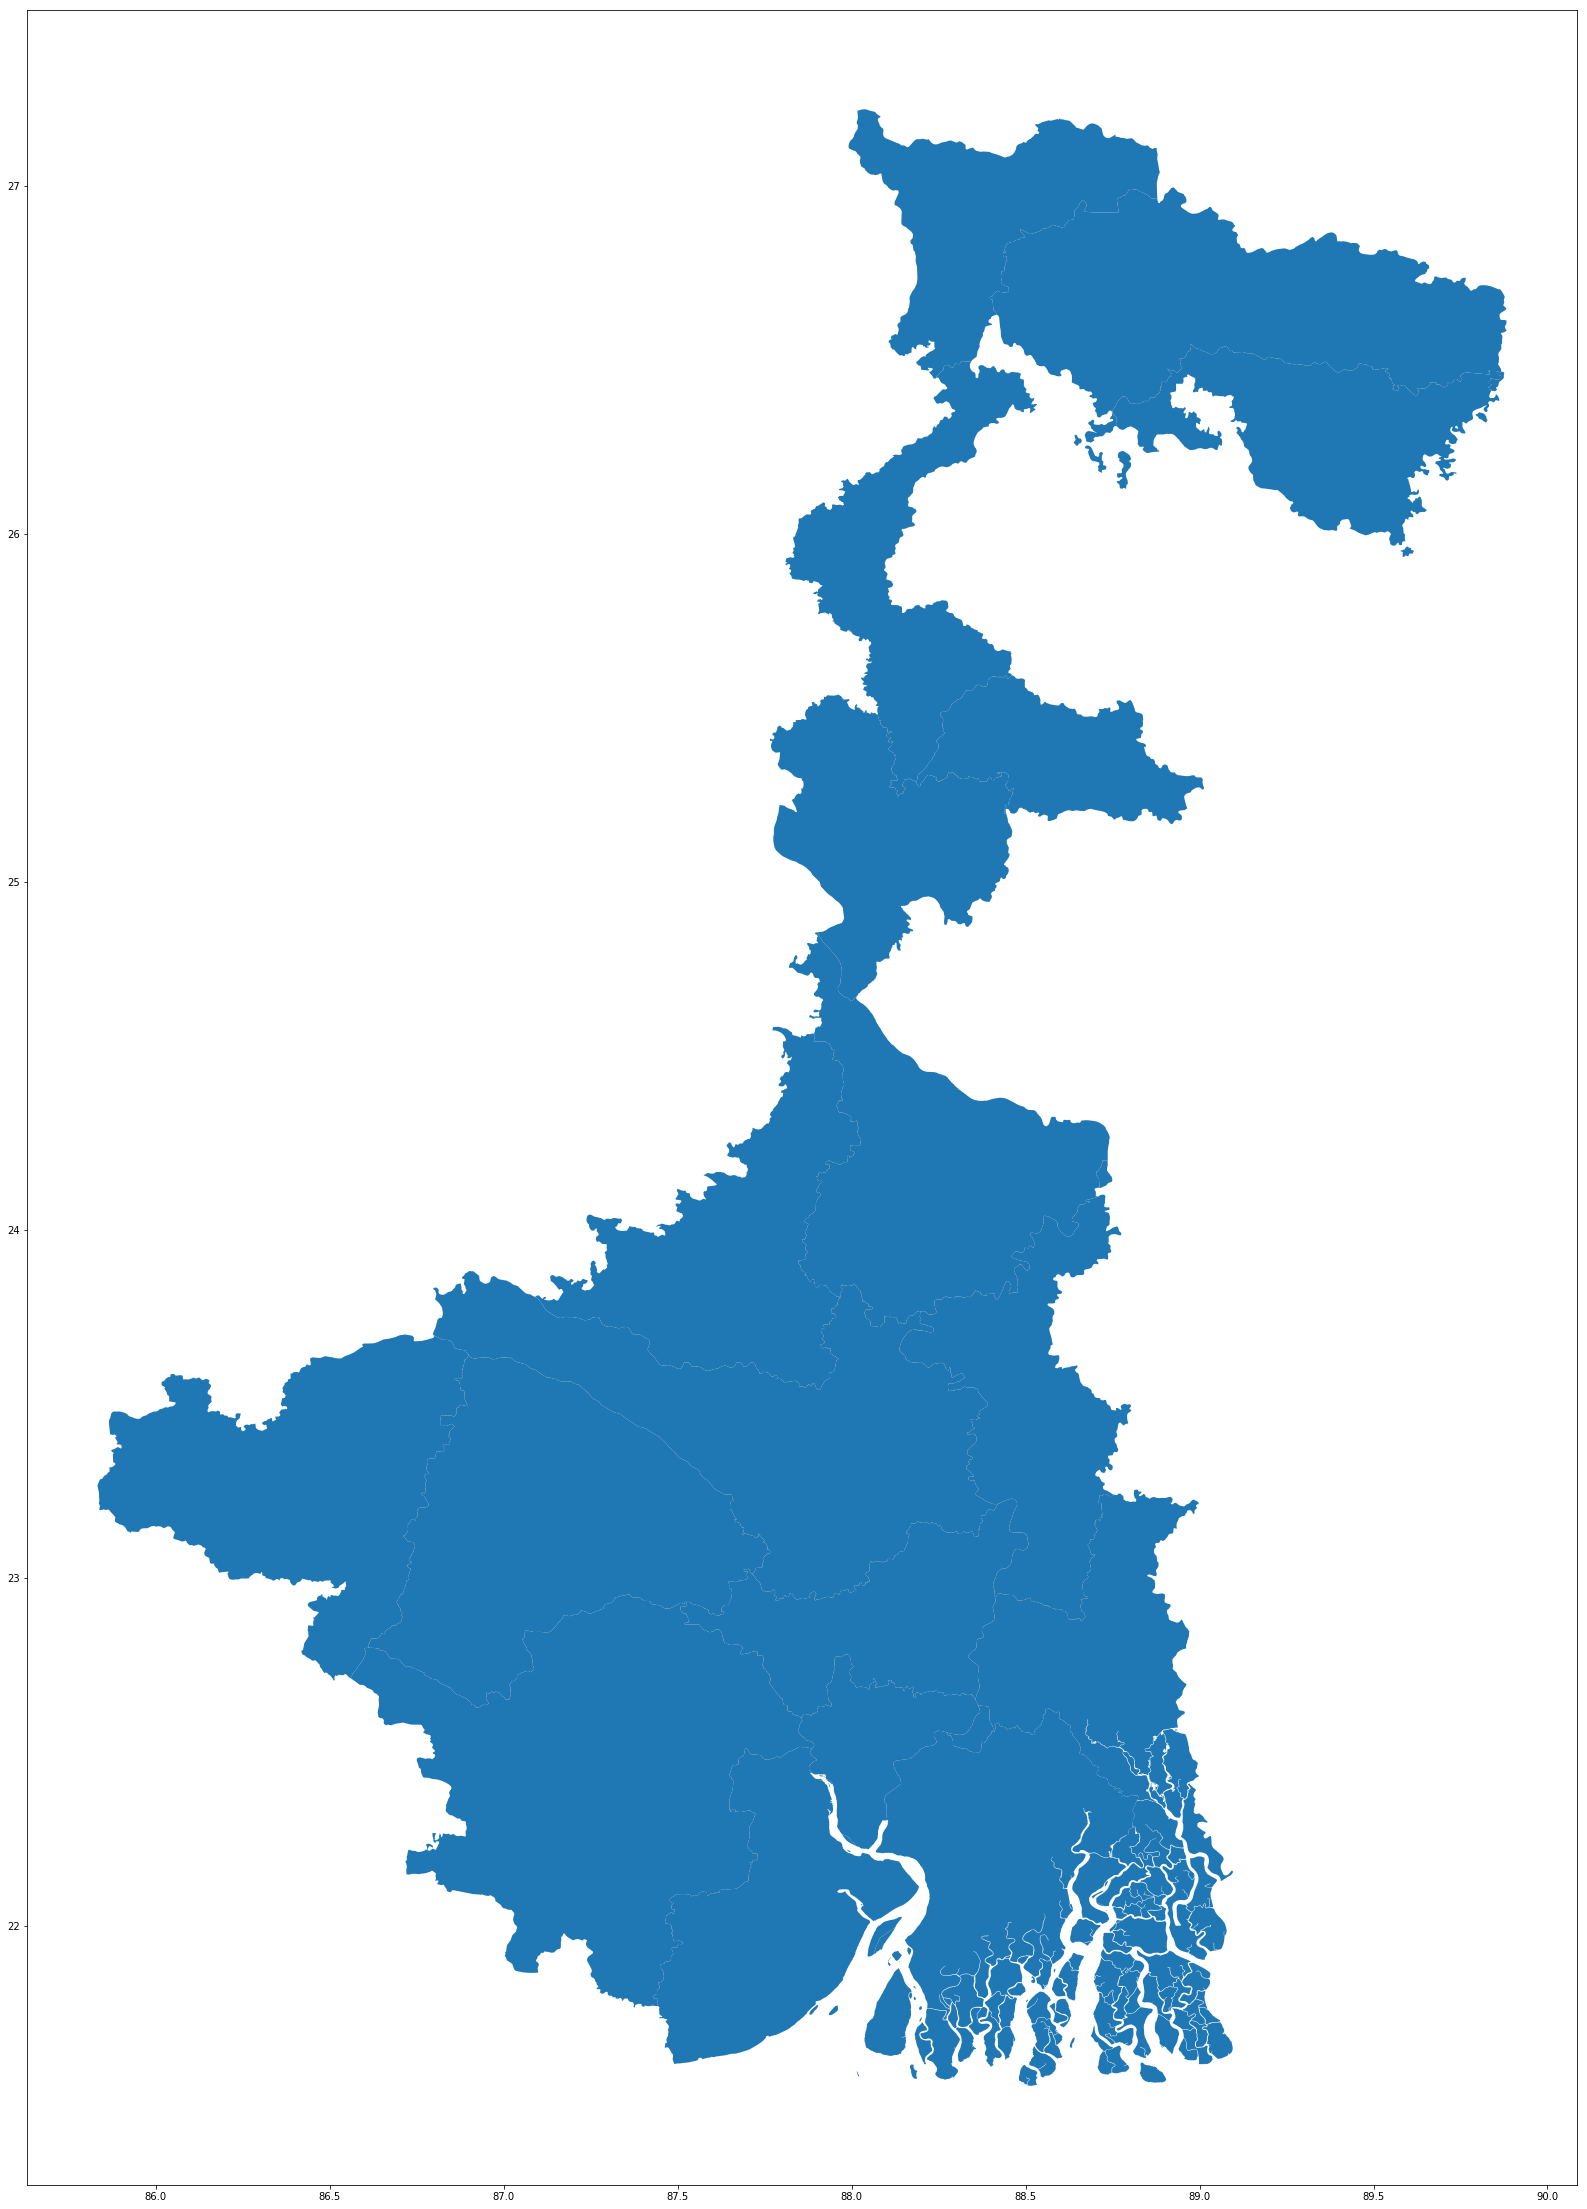

In [269]:
map_df = gpd.read_file("westbengal_district.shp")
#map_df.head()
map_df.plot(figsize = (40,40))

In [331]:
from shapely.geometry import Point
stops_df['StopCoordinates'] = list(zip(stops_df.stopLon,stops_df.stopLat))
stops_df['StopCoordinates'] = stops_df['StopCoordinates'].apply(Point)

In [332]:
X['StopCoordinates'] = stops_df['StopCoordinates']

In [333]:
X.head()

,stopName,routeStops,StopCoordinates
0,A.J BLOCK ( 206 BUS STAND),A.J BLOCK ( 206 BUS STAND),POINT (88.431122 22.642036)
1,CANTONMENT 2 NO. RAIL GATE,BABUGHAT (ESPLANADE),POINT (88.438289 22.652987)
2,PSC OFFICE,CANTONMENT 2 NO. RAIL GATE,POINT (88.395331 22.4897)
3,10 NO POOL,12 NO. TANK,POINT (88.214893 22.584474)
4,10 NO TANK,13 NO TANK,POINT (88.330894 22.525084)


In [334]:
a1 = X.stopName
a2 = X.routeStops

In [335]:
len(set(a1).intersection(a2))   # Initially 410, thus 410-386 = 24 values with no coordinates

384

In [336]:
X['routestopCoordinates'] = np.nan
X['Xcorr'] = np.nan
X['Ycorr'] = np.nan
X['Coordinates'] = np.nan


In [337]:
Y = X
Y.head()

,stopName,routeStops,StopCoordinates,routestopCoordinates,Xcorr,Ycorr,Coordinates
0,A.J BLOCK ( 206 BUS STAND),A.J BLOCK ( 206 BUS STAND),POINT (88.431122 22.642036),NaN,NaN,NaN,NaN
1,CANTONMENT 2 NO. RAIL GATE,BABUGHAT (ESPLANADE),POINT (88.438289 22.652987),NaN,NaN,NaN,NaN
2,PSC OFFICE,CANTONMENT 2 NO. RAIL GATE,POINT (88.395331 22.4897),NaN,NaN,NaN,NaN
3,10 NO POOL,12 NO. TANK,POINT (88.214893 22.584474),NaN,NaN,NaN,NaN
4,10 NO TANK,13 NO TANK,POINT (88.330894 22.525084),NaN,NaN,NaN,NaN


In [338]:
X = X.rename(columns = {'routeStops':'StartEndStops','stopName':'Stops'})
Y=X
Y.head()

,Stops,StartEndStops,StopCoordinates,routestopCoordinates,Xcorr,Ycorr,Coordinates
0,A.J BLOCK ( 206 BUS STAND),A.J BLOCK ( 206 BUS STAND),POINT (88.431122 22.642036),NaN,NaN,NaN,NaN
1,CANTONMENT 2 NO. RAIL GATE,BABUGHAT (ESPLANADE),POINT (88.438289 22.652987),NaN,NaN,NaN,NaN
2,PSC OFFICE,CANTONMENT 2 NO. RAIL GATE,POINT (88.395331 22.4897),NaN,NaN,NaN,NaN
3,10 NO POOL,12 NO. TANK,POINT (88.214893 22.584474),NaN,NaN,NaN,NaN
4,10 NO TANK,13 NO TANK,POINT (88.330894 22.525084),NaN,NaN,NaN,NaN


In [339]:
print(len(Y.Stops.isna()==True))
print(Y.StartEndStops.isna().sum())

1678
1268


In [340]:
#X.head()

In [341]:
for i,row1 in Y.iterrows():
    for j,row2 in Y.iterrows():
        if row1.Stops==row2.StartEndStops:
            f = Y.loc[i,'StopCoordinates']
            Y.loc[j,'Xcorr'] = f.x
            Y.loc[j,'Ycorr'] = f.y
Y['Coordinates'] = list(zip(Y.Xcorr,Y.Ycorr))
Y['routestopCoordinates'] = Y['Coordinates'].apply(Point)

In [342]:
Y = Y.drop(columns=['Xcorr','Ycorr','Coordinates'])

In [343]:
Y.head()

,Stops,StartEndStops,StopCoordinates,routestopCoordinates
0,A.J BLOCK ( 206 BUS STAND),A.J BLOCK ( 206 BUS STAND),POINT (88.431122 22.642036),POINT (88.431122 22.642036)
1,CANTONMENT 2 NO. RAIL GATE,BABUGHAT (ESPLANADE),POINT (88.438289 22.652987),POINT (nan nan)
2,PSC OFFICE,CANTONMENT 2 NO. RAIL GATE,POINT (88.395331 22.4897),POINT (88.438289 22.652987)
3,10 NO POOL,12 NO. TANK,POINT (88.214893 22.584474),POINT (88.333479 22.535232)
4,10 NO TANK,13 NO TANK,POINT (88.330894 22.525084),POINT (88.41135300000001 22.56822)


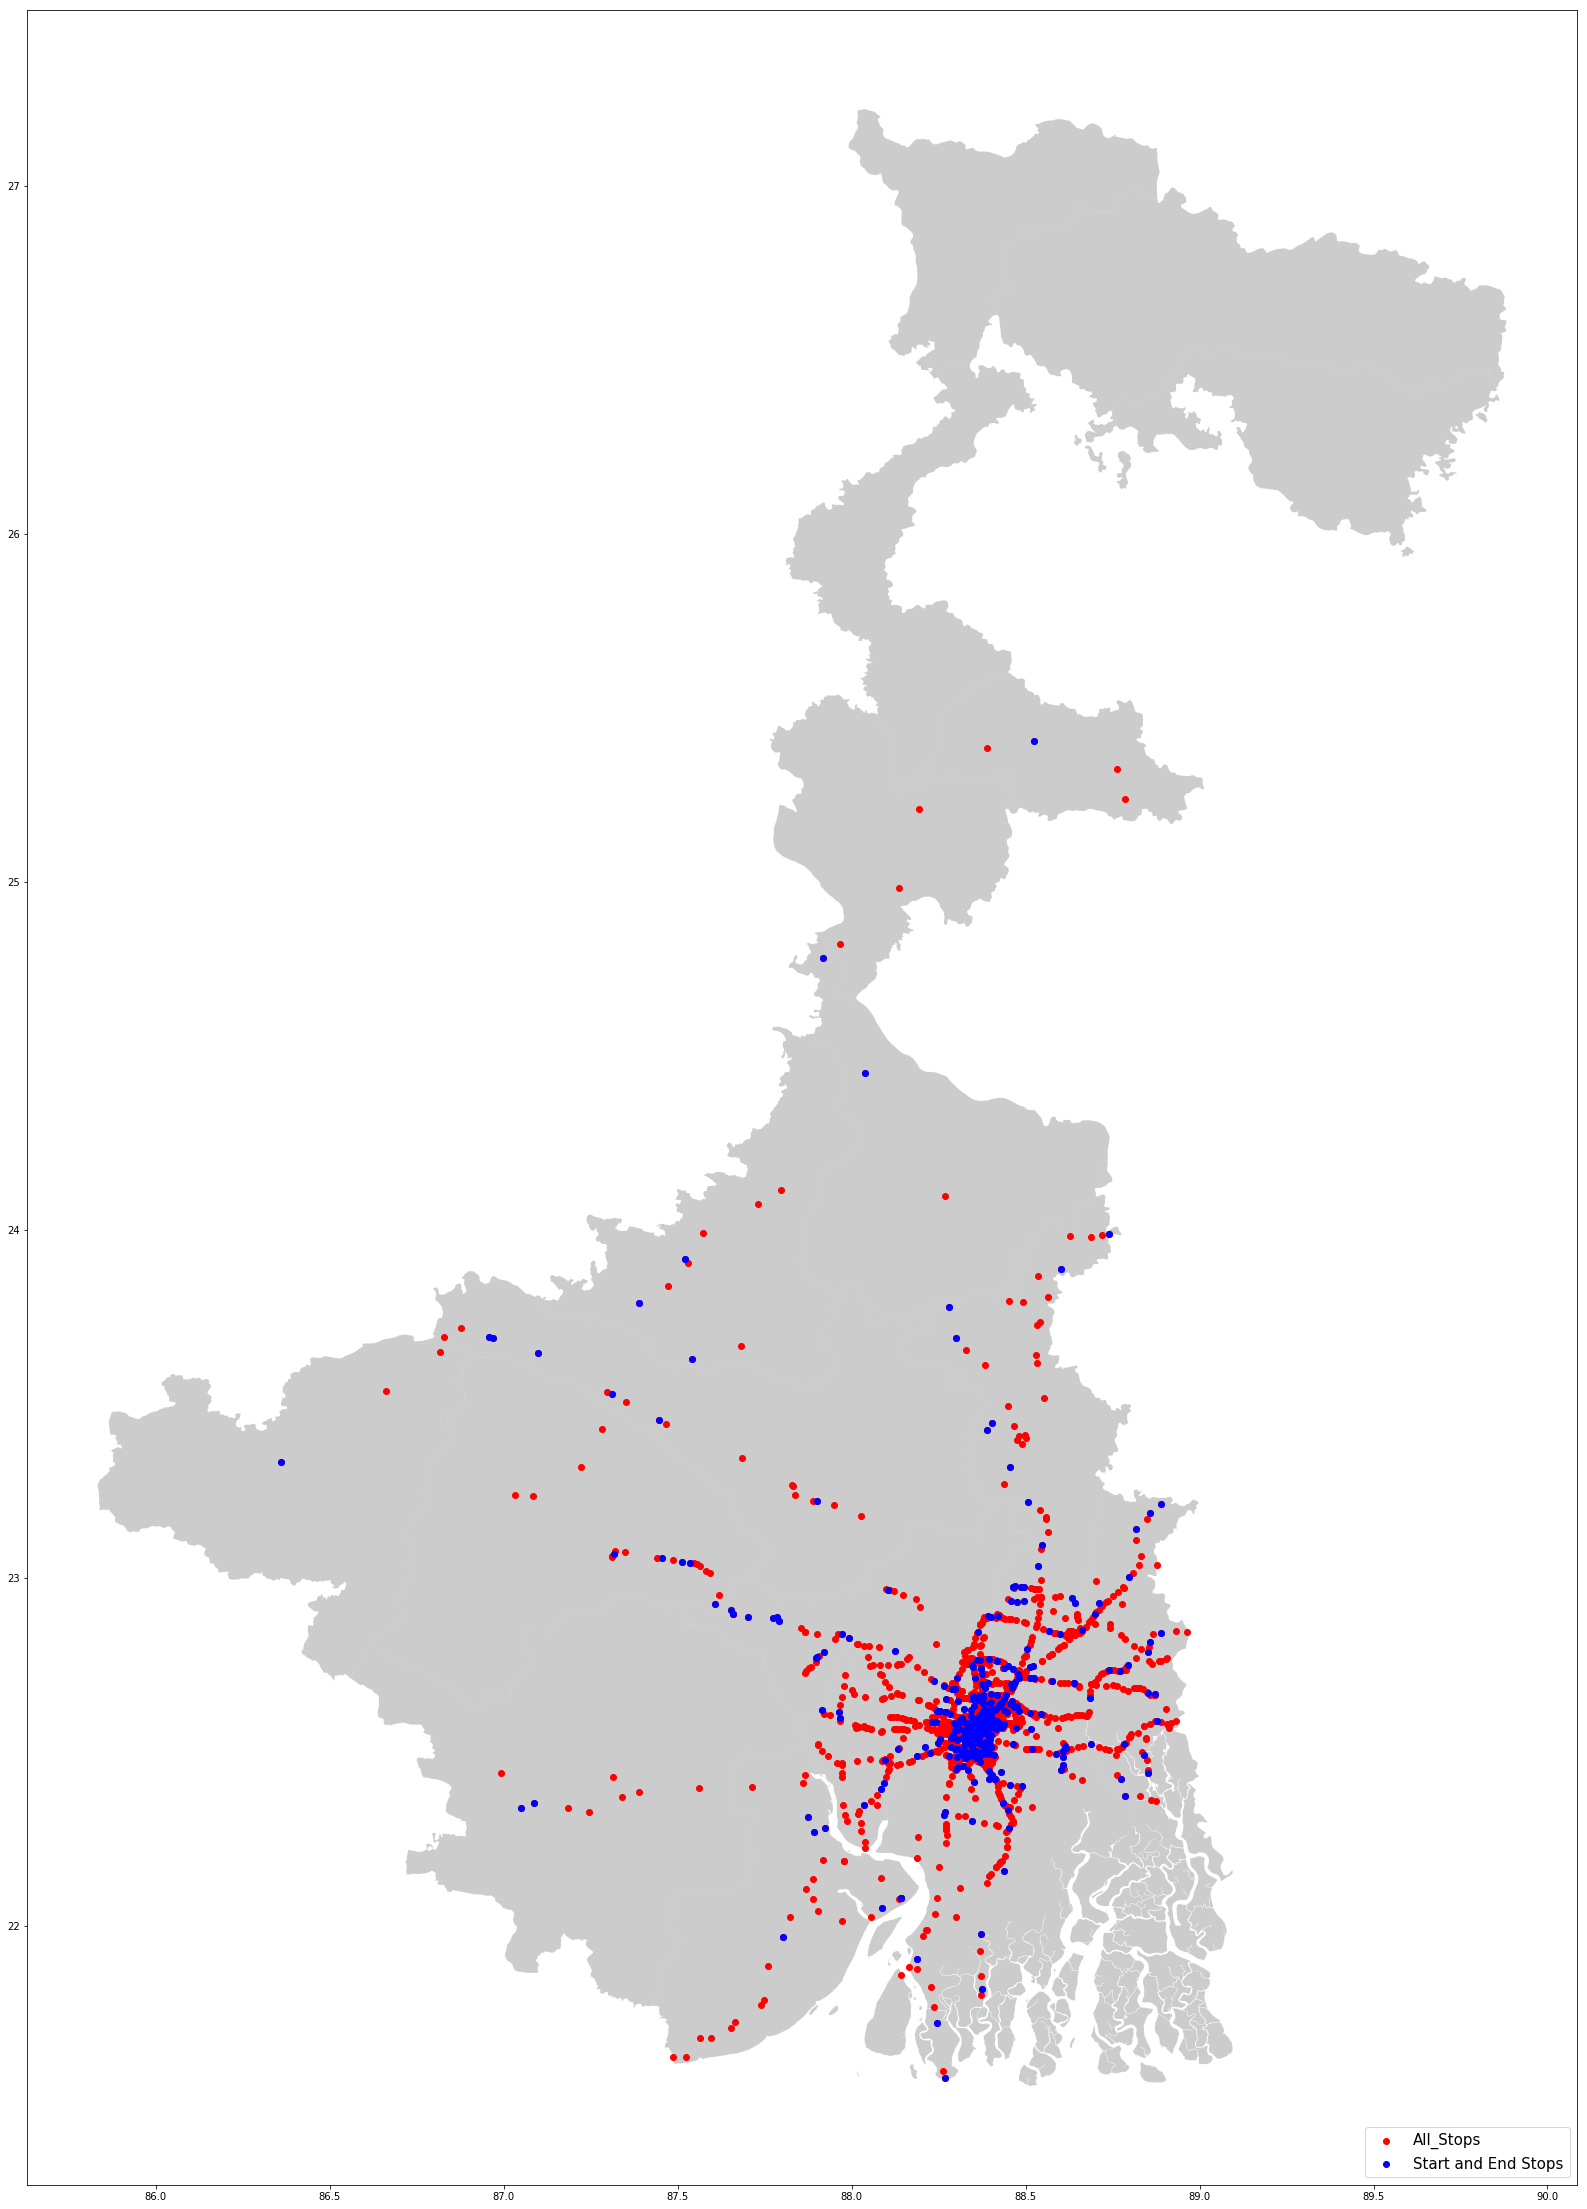

In [354]:
gdf1 = gpd.GeoDataFrame(Y, geometry='routestopCoordinates')
gdf2 = gpd.GeoDataFrame(Y, geometry='StopCoordinates')
fig,ax = plt.subplots(figsize=(40,40))
map_df.plot(ax=ax, alpha=0.4, color = 'grey')

gdf2.plot(ax=ax,color = 'red',label = 'All_Stops')
gdf1.plot(ax=ax,color='blue',label = 'Start and End Stops')
plt.legend(loc='lower right',prop = {'size': 15})

In [355]:
single_df = pd.read_csv('Single_Vehicle_Data.csv')

In [357]:
single_df.head()

,id,routeCode,Started,OutofPath,Latitude,Longitude,speed,direction,angle,violatespath,date,time,Day
0,5c463f34e03d097766ad0d3b,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:52.890Z,Monday
1,5c463f38e03d097766ad1538,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:56.246Z,Monday
2,5c463f3be03d097766ad1d35,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:59.588Z,Monday
3,5c463f3ee03d097766ad2532,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:02.938Z,Monday
4,5c463f42e03d097766ad2d2f,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:06.300Z,Monday


In [358]:
single_day = single_df[single_df['Day']=='Monday']

In [360]:
single_day.head()

,id,routeCode,Started,OutofPath,Latitude,Longitude,speed,direction,angle,violatespath,date,time,Day
0,5c463f34e03d097766ad0d3b,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:52.890Z,Monday
1,5c463f38e03d097766ad1538,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:56.246Z,Monday
2,5c463f3be03d097766ad1d35,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:59.588Z,Monday
3,5c463f3ee03d097766ad2532,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:02.938Z,Monday
4,5c463f42e03d097766ad2d2f,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:06.300Z,Monday


In [365]:
# For every minute recorded data-
single_day['Coordinates'] = list(zip(single_day.Longitude,single_day.Latitude))

/home/pranjal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [366]:
single_day.head()

,id,routeCode,Started,OutofPath,Latitude,Longitude,speed,direction,angle,violatespath,date,time,Day,Coordinates
0,5c463f34e03d097766ad0d3b,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:52.890Z,Monday,"(88.459122, 22.342026)"
1,5c463f38e03d097766ad1538,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:56.246Z,Monday,"(88.459122, 22.342026)"
2,5c463f3be03d097766ad1d35,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:59.588Z,Monday,"(88.459122, 22.342026)"
3,5c463f3ee03d097766ad2532,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:02.938Z,Monday,"(88.459137, 22.342052)"
4,5c463f42e03d097766ad2d2f,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:06.300Z,Monday,"(88.459137, 22.342052)"


In [367]:
single_day['Coordinates'] = single_day['Coordinates'].apply(Point)

/home/pranjal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [369]:
single_day.head()

,id,routeCode,Started,OutofPath,Latitude,Longitude,speed,direction,angle,violatespath,date,time,Day,Coordinates
0,5c463f34e03d097766ad0d3b,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:52.890Z,Monday,POINT (88.45912199999999 22.342026)
1,5c463f38e03d097766ad1538,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:56.246Z,Monday,POINT (88.45912199999999 22.342026)
2,5c463f3be03d097766ad1d35,218:DN,TRUE,False,22.342026,88.459122,0,N,106,FALSE,1/21/2019,21:52:59.588Z,Monday,POINT (88.45912199999999 22.342026)
3,5c463f3ee03d097766ad2532,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:02.938Z,Monday,POINT (88.459137 22.342052)
4,5c463f42e03d097766ad2d2f,218:DN,TRUE,False,22.342052,88.459137,0,NE,106,FALSE,1/21/2019,21:53:06.300Z,Monday,POINT (88.459137 22.342052)


No handles with labels found to put in legend.


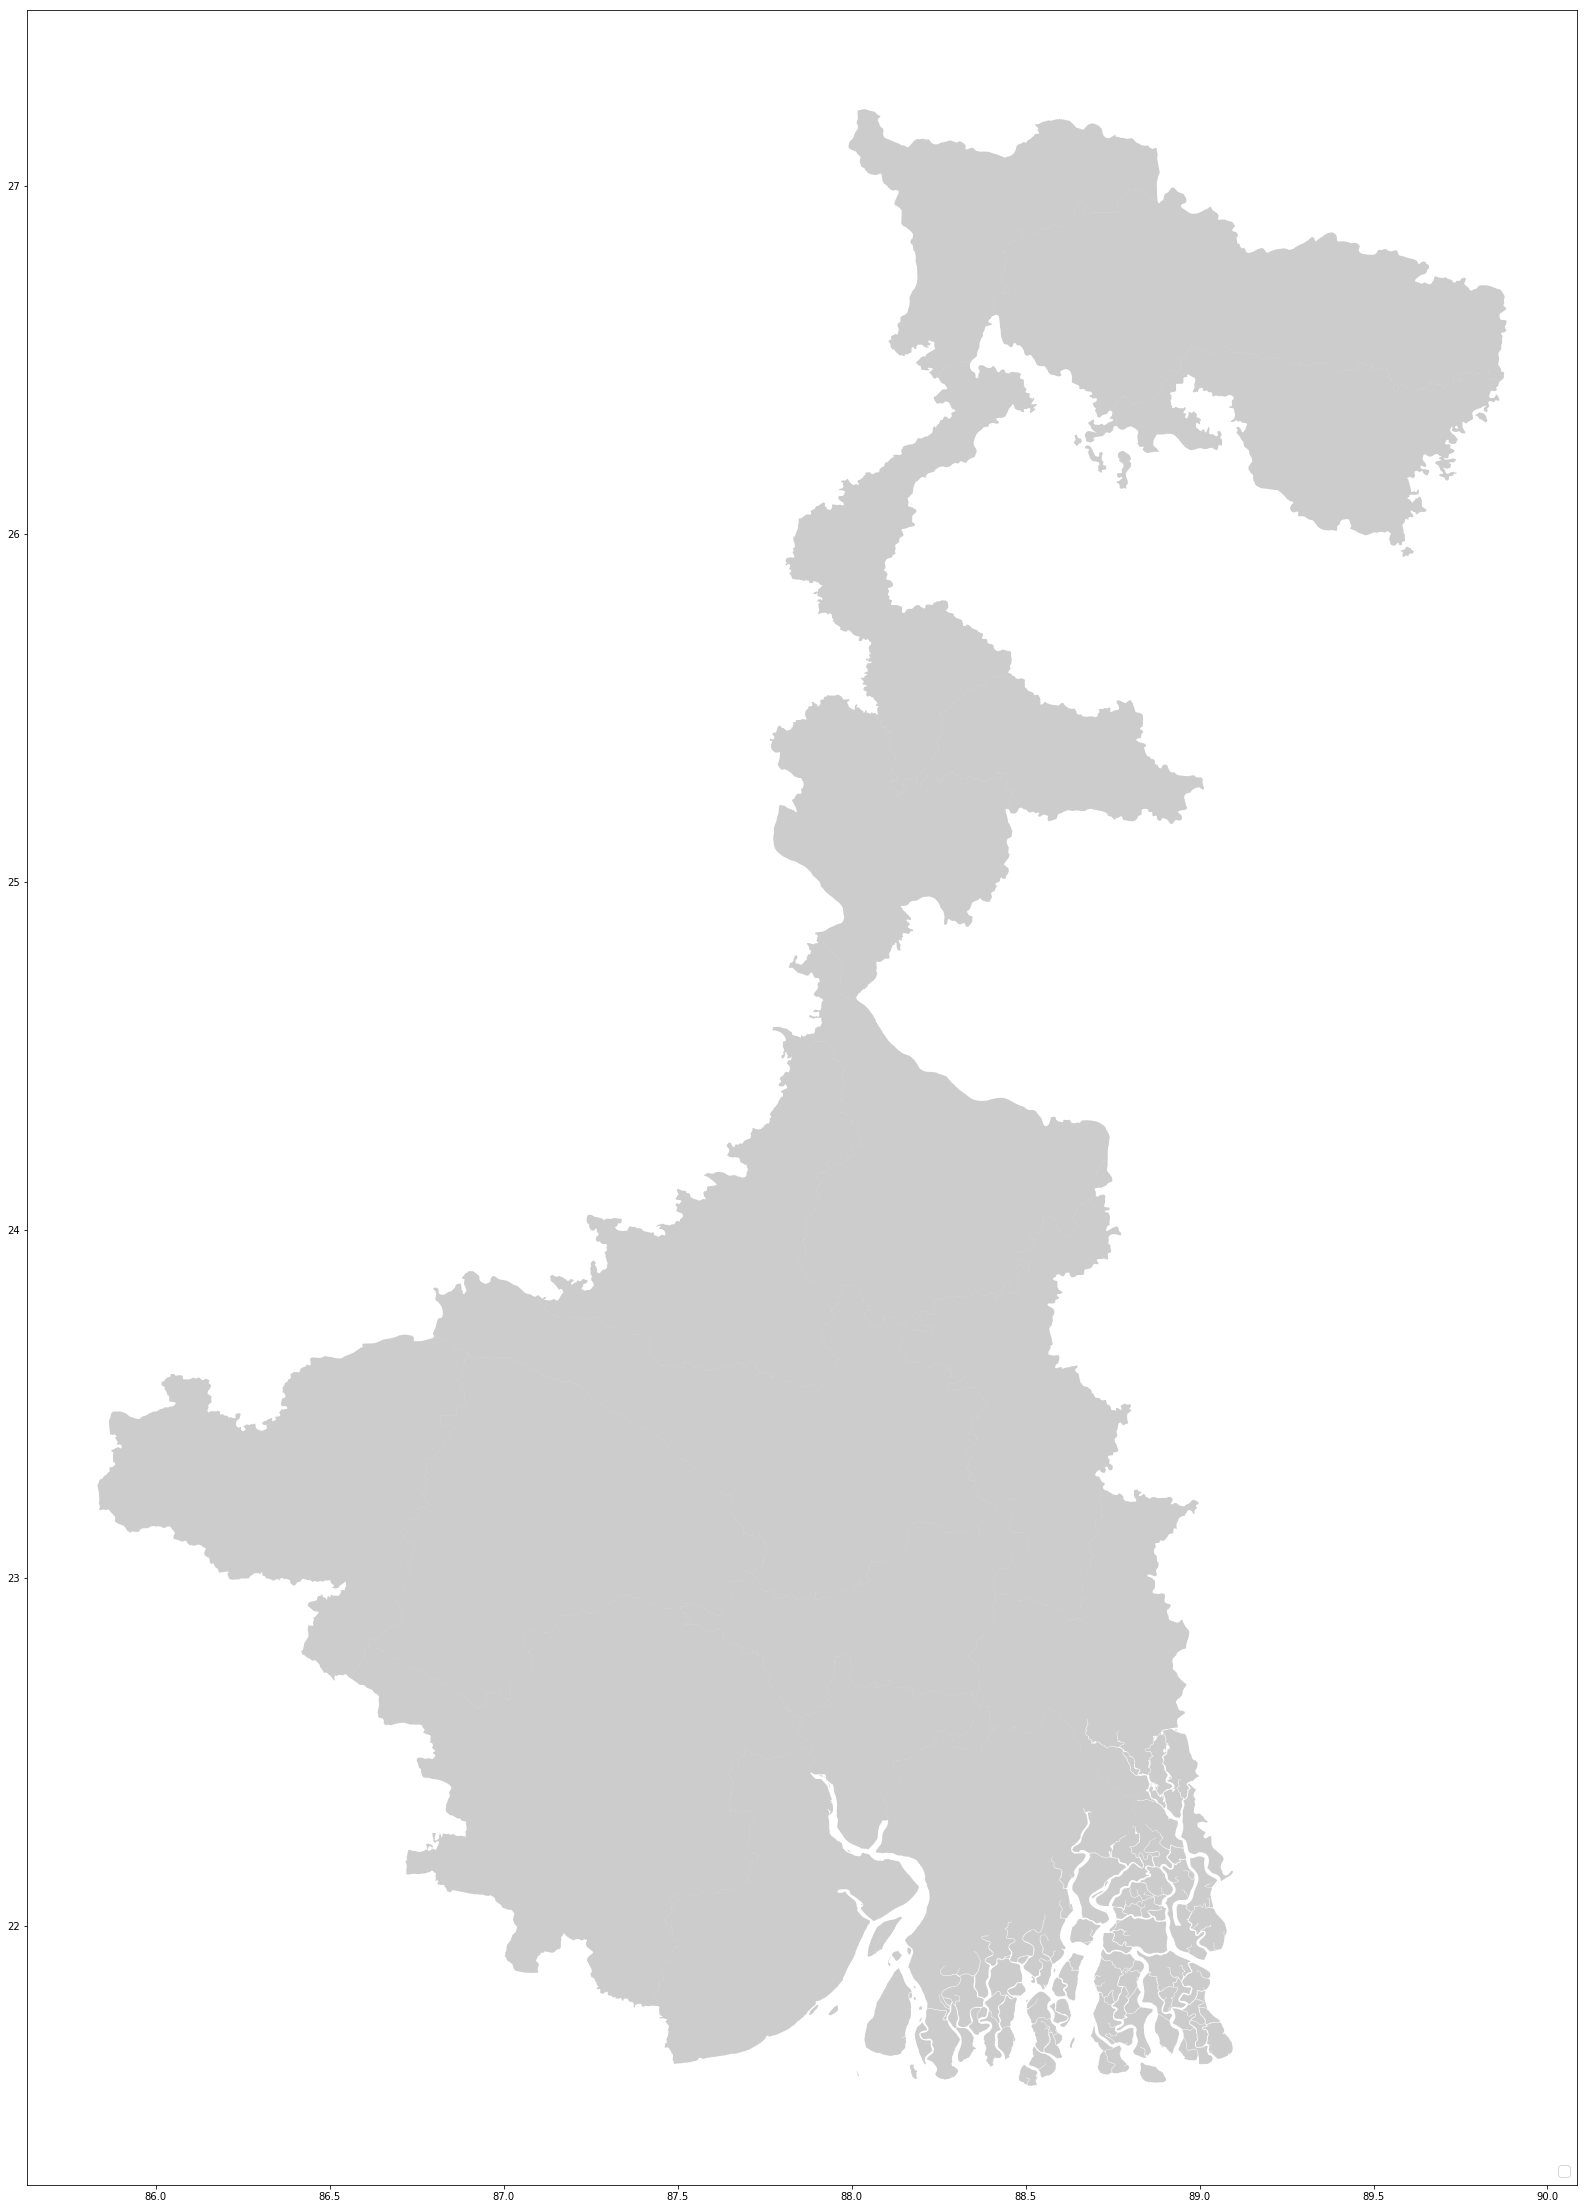

In [373]:
gdf1 = gpd.GeoDataFrame(single_day, geometry='Coordinates')
#gdf2 = gpd.GeoDataFrame(Y, geometry='StopCoordinates')
fig,ax = plt.subplots(figsize=(40,40))
map_df.plot(ax=ax, alpha=0.4, color = 'grey')

#gdf2.plot(ax=ax,color = 'red',label = 'All_Stops')
#gdf1.plot(ax=ax,color='blue',label = 'Route for  218:DN')
plt.legend(loc='lower right',prop = {'size': 15})

In [371]:
single_day.Latitude.min()

22.341986

In [377]:
single_day.Longitude.sort_values() # Error in value maybe or earlier processing error

830      8.845916
835      8.845916
834      8.845916
833      8.845916
832      8.845916
831      8.845916
1131     8.845916
1132     8.845916
1133     8.845916
1135     8.845916
1136     8.845916
1137     8.845916
1134     8.845916
1139     8.845916
828      8.845916
829      8.845916
1146     8.845916
1138     8.845916
1144     8.845916
1145     8.845916
1143     8.845916
1142     8.845916
1141     8.845916
1140     8.845916
1007    88.459076
1011    88.459076
1010    88.459076
1009    88.459076
1008    88.459076
1012    88.459076
          ...    
70      88.459206
50      88.459206
51      88.459206
52      88.459206
49      88.459206
54      88.459206
68      88.459206
67      88.459206
66      88.459206
65      88.459206
64      88.459206
63      88.459206
62      88.459206
61      88.459206
60      88.459206
53      88.459206
88      88.459206
59      88.459206
58      88.459206
57      88.459206
56      88.459206
55      88.459206
378     88.459221
381     88.459221
377     88

In [383]:
for x,row in single_day.iterrows():
    if int(row.Longitude/10)==0:
        single_day.loc[x,'Longitude'] = row.Longitude*10
        

/home/pranjal/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [379]:
single_day.Latitude.sort_values()

297    22.341986
312    22.341986
313    22.341986
314    22.341986
316    22.341986
317    22.341986
318    22.341986
319    22.341986
320    22.341986
321    22.341986
322    22.341986
323    22.341986
324    22.341986
325    22.341986
326    22.341986
298    22.341986
328    22.341986
327    22.341986
311    22.341986
310    22.341986
315    22.341986
308    22.341986
300    22.341986
309    22.341986
330    22.341986
299    22.341986
301    22.341986
302    22.341986
329    22.341986
304    22.341986
         ...    
823    22.342146
822    22.342146
821    22.342146
820    22.342146
811    22.342146
812    22.342146
813    22.342146
825    22.342146
819    22.342146
817    22.342146
816    22.342146
815    22.342146
814    22.342146
888    22.342150
895    22.342150
894    22.342150
893    22.342150
892    22.342150
889    22.342150
891    22.342150
880    22.342150
881    22.342150
882    22.342150
883    22.342150
890    22.342150
885    22.342150
886    22.342150
887    22.3421

In [384]:
single_day.Longitude.sort_values()

892     88.459076
999     88.459076
1000    88.459076
1001    88.459076
1002    88.459076
1003    88.459076
1004    88.459076
1005    88.459076
1006    88.459076
1007    88.459076
1008    88.459076
1009    88.459076
1010    88.459076
1011    88.459076
1012    88.459076
1013    88.459076
895     88.459076
894     88.459076
893     88.459076
891     88.459076
998     88.459076
890     88.459076
889     88.459076
885     88.459076
886     88.459076
887     88.459076
888     88.459076
882     88.459076
881     88.459076
880     88.459076
          ...    
422     88.459206
421     88.459206
420     88.459206
419     88.459206
418     88.459206
417     88.459206
416     88.459206
415     88.459206
414     88.459206
429     88.459206
38      88.459206
430     88.459206
432     88.459206
70      88.459206
71      88.459206
72      88.459206
73      88.459206
74      88.459206
75      88.459206
433     88.459206
56      88.459206
431     88.459206
380     88.459221
379     88.459221
378     88

In [389]:
single_day['Coordinates'] = list(zip(single_day.Longitude,single_day.Latitude))

In [390]:
single_day['Coordinates'] = single_day['Coordinates'].apply(Point)

In [ ]:
gdf1 = gpd.GeoDataFrame(single_day, geometry='Coordinates')
#gdf2 = gpd.GeoDataFrame(Y, geometry='StopCoordinates')
fig,ax = plt.subplots(figsize=(30,30))
map_df.plot(ax=ax, alpha=0.4, color = 'grey')

#gdf2.plot(ax=ax,color = 'red',label = 'All_Stops')
gdf1.scatter(ax=ax,color='blue',label = 'Route for  218:DN')

plt.xlim(single_day.Longitude.min(), single_day.Longitude.max())
plt.ylim(single_day.Latitude.min(),single_day.Latitude.max())

plt.legend(loc='lower right',prop = {'size': 15})

In [ ]:
gdf1.plot.line(ax=ax,color='blue',label = 'Route for  218:DN')

(22.341486, 22.34265)

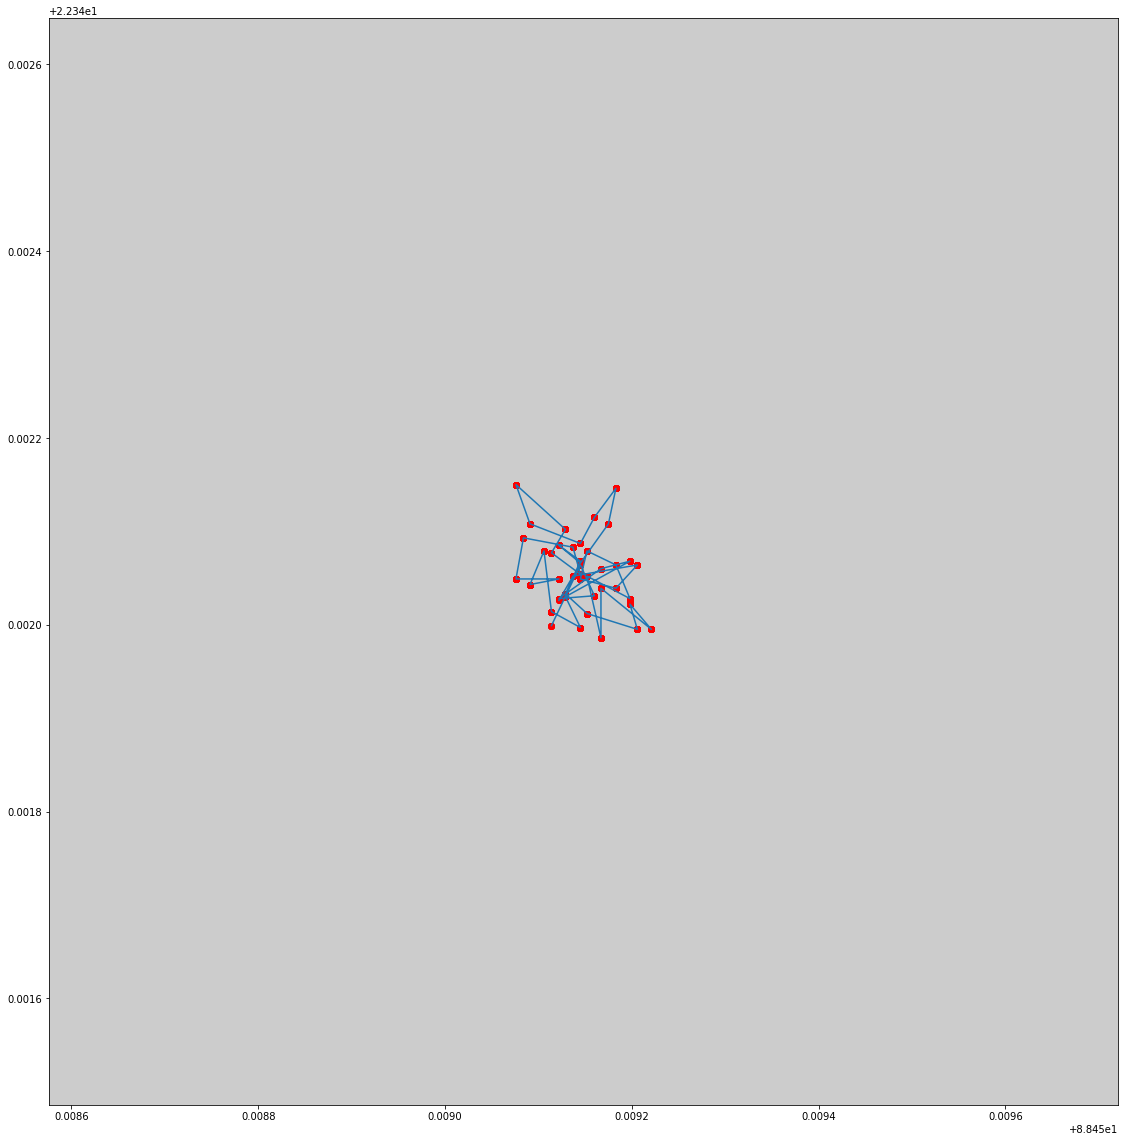

In [418]:
fig,ax = plt.subplots(figsize=(20,20))
map_df.plot(ax=ax, alpha=0.4, color = 'grey')
gdf1.plot(ax=ax,color='red',label = 'Route for  218:DN')
plt.plot(single_day.Longitude,single_day.Latitude)
plt.xlim(single_day.Longitude.min()-0.0005, single_day.Longitude.max()+0.0005)
plt.ylim(single_day.Latitude.min()-0.0005,single_day.Latitude.max()+0.0005)

In [457]:
bus1 = routes_df[routes_df['routeShortName']=='218:DN']

In [458]:
bus1.reset_index(inplace=True,drop=True)

In [459]:
bus1

,endStop,routeDepot,routeDepotList,routeId,routeLongName,routeShortName,startStop
0,UTTARBHAG,OTHER,['OTHER'],5776,BABUGHAT - UTTARBHAG,218:DN,BABUGHAT


In [460]:
bus1.loc[0,'startStop']

'BABUGHAT'

In [461]:
s1 = bus1.loc[0,'startStop']
s2 = bus1.loc[0,'endStop']

In [467]:
stops_df[(stops_df['stopName']==s1) | ((stops_df['stopName']==s2)) ]

,locationType,stopId,stopLat,stopLon,stopName,Coordinates,StopCoordinates
9,STOP,11,22.563749,88.338575,BABUGHAT,POINT (88.33857500000001 22.563749),POINT (88.33857500000001 22.563749)
1591,STOP,2958,22.339994,88.518466,UTTARBHAG,POINT (88.518466 22.339994),POINT (88.518466 22.339994)


In [468]:
stop_corr = stops_df[(stops_df['stopName']==s1) | ((stops_df['stopName']==s2)) ].StopCoordinates

In [471]:
stop_corr

9       POINT (88.33857500000001 22.563749)
1591            POINT (88.518466 22.339994)
Name: StopCoordinates, dtype: object

In [472]:
gdf3 = gpd.GeoDataFrame(stop_corr, geometry='StopCoordinates')

In [481]:
gdf3

,StopCoordinates
9,POINT (88.33857500000001 22.563749)
1591,POINT (88.518466 22.339994)


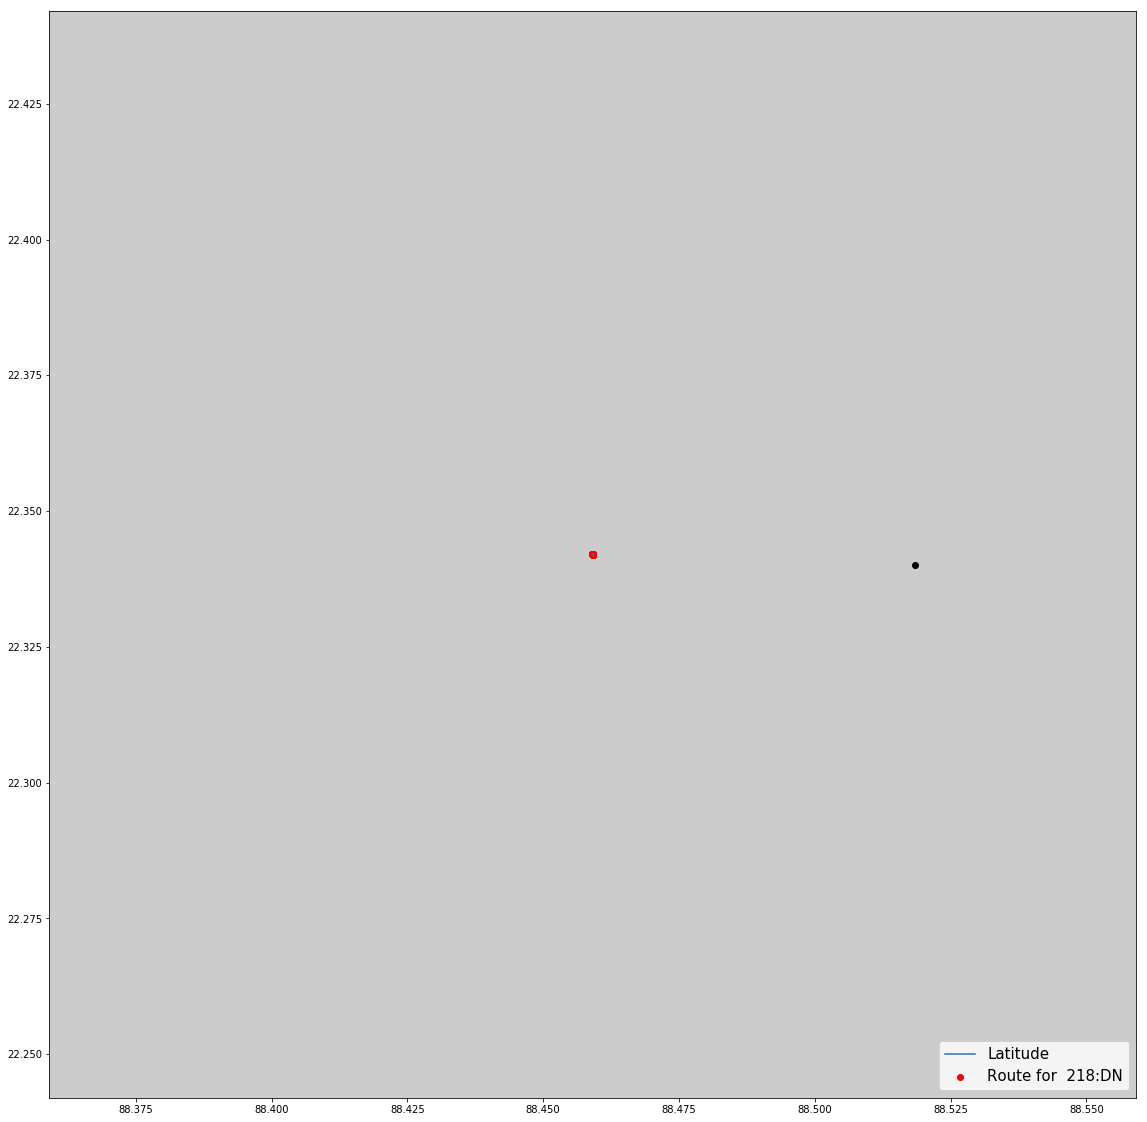

In [490]:
fig,ax = plt.subplots(figsize=(20,20))
map_df.plot(ax=ax, alpha=0.4, color = 'grey')
gdf1.plot(ax=ax,color='red',label = 'Route for  218:DN')
gdf3.plot(ax=ax,color='black')
plt.plot(single_day.Longitude,single_day.Latitude)
plt.xlim(single_day.Longitude.min()-0.1, single_day.Longitude.max()+0.1)
plt.ylim(single_day.Latitude.min()-0.1,single_day.Latitude.max()+0.1)
plt.legend(loc='lower right',prop = {'size': 15})

In [482]:
single_day.Longitude.min()

88.459076

In [483]:
single_day.Longitude.max()

88.459221

In [484]:
stop_corr

9       POINT (88.33857500000001 22.563749)
1591            POINT (88.518466 22.339994)
Name: StopCoordinates, dtype: object

In [486]:
single_day.Latitude.min()

22.341986

In [487]:
single_day.Latitude.max()

22.34215